## Using Widgets

Widgets are interactive objects on the notebook: buttons, check boxes, sliders and drop-down menus that allow the user to control actions in the notebook in a simple "point-and-click" methods.

Widgets are a quick way to get interactivity in your Jupyter displays. You can read more about them here:
[Widget notes](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html)

Jupyter has its own version of widgets, based on iPython widgets. We use the **interact** command to access them.


To get started, we import the **interact** function from the **ipywidgets** module. 

In [1]:
from ipywidgets import interact

### Basic structure

A widget is something you see on the computer screen that you click on, or move with the computer mouse, or enter text and data. It then does something. 

The key is to define a function that that will do that "something." 

Here is a really simple function, it just returns whatever is input to it. 

In [2]:
def f(x):
    return x

**Next** We create the widgets by calling the **interact** function, using an argument type for **x**. The choice of type of data **x** will automatically select wheter we get a slider, check box, text entry boxes, etc.

Here are a few examples. **Note:** It is useful to end the function call with a semicolon, to suppress useless output. 

In [12]:
interact(f,x=(0,10));  # a slider with integer outputs

6

In [13]:
interact(f,x=(0.0,10.0)); # a slider with floating point outputs 

4.9

In [14]:
interact(f,x=True); # a check box with True/False output

True

In [15]:
interact(f,x='Hello World'); # an editable text box

'Hello World'

In [16]:
interact(f, x={'One': 1, 'Two': 2, 'Three': 3, 'Forty four': 44}); # a drop-down list

1

## Using widgets in plotting

**Now** let's do some more interesting examples where we get the widget to plot something interesting.

We will import some utility functions for plotting and numerics.

In [18]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

**First** we define the update function which will plot something interesting for us. In this case we plot the power function $$f(x) = x^k$$ for various values of $k$. We set a range of values from 0 to 1 to plot. 

The **show** command in the function is important, to get the plot to display.

In [19]:
x=linspace(0,1)

def update(k=0):
    plot(x,x**k)
    show()

**Now** we can the interact commad using the update function, and a slider.

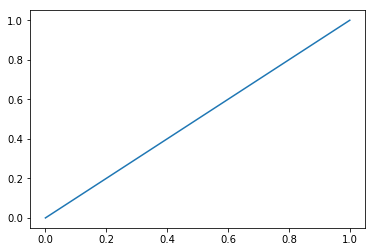

In [20]:
interact(update,k=(1,10));

**We** can do more complex plots with many sliders. For instance, let's explore the sine funciton as it ofter appears in signal processing. It can have an amplitude, frequency and phase. We define the appropriate function and include sliders for this.

$$t\mapsto A\sin(2\pi f t + \phi ).$$

When we define the function, we can include some default values in the argument list.

In [21]:
t = linspace(0,1,1000)

def plot_sine(A=4,f=2,phi=0):
    plot(t,A*sin(2*pi*f*t + phi))
    axis([0,1,-6,6])
    show()

When calling the **interact** function, makes sure the list of parameters have the same name as the action function.

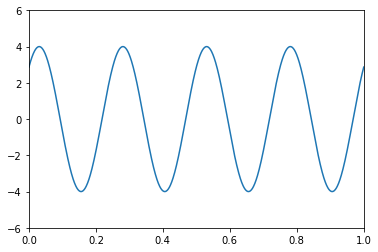

In [22]:
interact(plot_sine,A=(0,10), f=(1,10), phi=(0,2*pi));

## Other graphics

You are not limited to simple 2D plots. The widgets can control more interesting graphics, as in this network example. This come from the site  [github.com/jupyter-widgets/ipywidgets](https://github.com/jupyter-widgets/ipywidgets)

In [23]:
import networkx as nx

In [24]:
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    show()

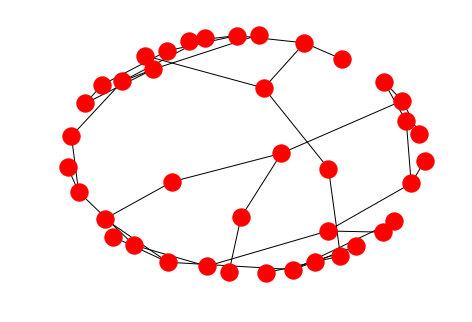

In [25]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
         generator={
             'lobster': random_lobster,
             'power law': powerlaw_cluster,
             'Newman-Watts-Strogatz': newman_watts_strogatz,
             u'Erdős-Rényi': erdos_renyi,
         });